In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split

In [0]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [0]:
d=pd.read_csv("/content/Dataset_PCA.csv")
dataset=d.to_numpy()

In [0]:
# split into input (X) and output (Y) variables
X = dataset[:,0:5]
Y = dataset[:,5]

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, shuffle=True)

In [0]:
model=load_model("/content/Keras_1.h5")

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                72        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Fit the model
history = model.fit(X_train, Y_train, validation_split=0.50, epochs=150, batch_size=10, verbose=0)

In [0]:
Y_test = Y_test[np.isfinite(Y_test)]

In [0]:
# make class predictions and get parameters with the model
Y_pred = model.predict_classes(X_test)

In [27]:
# summarize the first 150 cases
for i in range(150):
	print('%s => %d (expected %d)' % (X_test[i].tolist(), Y_pred[i], Y_test[i]))

[9.12266678167705, 0.138870539403826, 0.7345350072122679, -0.13515174245883999, 0.506756739251808] => 1 (expected 1)
[-18.4233454163623, -2.8234460164187505, 1.07418973665645, -1.30150927397432, 0.985732025021895] => 0 (expected 1)
[-2.21816488482411, -1.20340670095793, 0.8685000200495009, -0.12498478357450599, -0.0311884376773906] => 0 (expected 0)
[-2.66279707575762, -0.28696938019307694, -0.00936007795521504, 0.175283610634568, 1.7528231587539802] => 0 (expected 0)
[-1.74115501423765, -0.800852172847365, -0.679109065369246, -0.12320661275202198, -0.7240279539381179] => 0 (expected 0)
[-1.3862065761786801, -0.129884927312744, 1.25581520380924, 0.0536561567492514, -0.0784125663955544] => 0 (expected 0)
[0.0780059014837845, 0.9896748813406071, 0.8926087646205629, -1.3331664362242701, -0.12122761963483501] => 0 (expected 0)
[-0.6395924381499489, 0.7554524993494549, -0.7663076359952171, -0.19316257025509398, -0.7335009921280401] => 0 (expected 0)
[-0.697867789823367, -3.30796576440983, 2

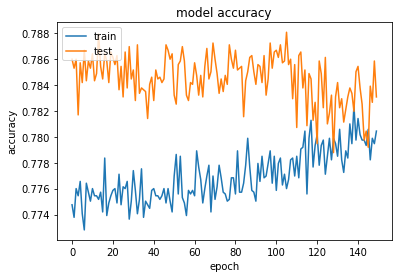

In [28]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

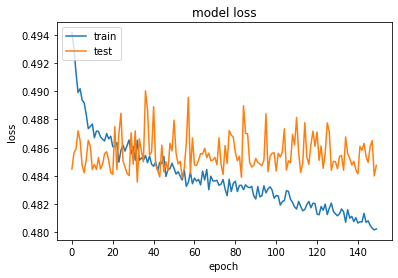

In [29]:
#summarize history for loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, Y_pred)
print('F1 score: %f' % f1)
 # kappa
kappa = cohen_kappa_score(Y_test, Y_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc_1 = roc_auc_score(Y_test, Y_pred)
print('ROC AUC: %f' % auc_1)
# confusion matrix
matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:' % matrix)

Accuracy: 0.784197
Precision: 0.668738
Recall: 0.568051
F1 score: 0.614296
Cohens kappa: 0.465859
ROC AUC: 0.723000
Confusion Matrix:


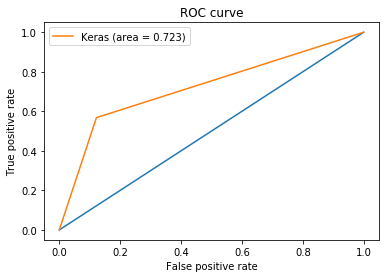

In [31]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, Y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()